# Import modules

In [1]:
from arcgis.geometry import filters
import arcpy
from arcpy import env
import json
import numpy as np

In [2]:
import pandas as pd

In [3]:
from arcgis.features import SpatialDataFrame

In [4]:
import matplotlib.pyplot as plt

In [5]:
from arcgis.features import summarize_data

In [48]:
from arcgis.gis import GIS

gis = GIS("http://slustl.maps.arcgis.com/home", "lbernett_SLUSTL")


Enter password: ········


In [8]:
from arcgis.geoenrichment import *

# Import feature layer from ArcGIS Online

In [42]:
from arcgis.features import FeatureLayer
county_url= 'https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/Tapestry_Households/FeatureServer/1'
fl = FeatureLayer(county_url)

In [43]:
map1 = gis.map('Missouri')

In [44]:
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

# Analyze data on map

In [45]:
map1.add_layer(fl)

In [46]:
usa  =  Country.get('US')
type(usa)

arcgis.geoenrichment.enrichment.Country

In [49]:
geom = usa.subgeographies.states['Missouri'].geometry

# Visualize data for Missouri

In [50]:
map1.draw(geom)

In [61]:
sp_rel = "esriSpatialRelIntersects"
sp_filter = filters.intersects (geometry= geom)

In [62]:
sdf= fl.query (geometry_filter=sp_filter, return_all_records=True).df

# View data table to answer questions

In [55]:
sdf.head ()

,County_AREA,Flier_URL,ID,NAME,OBJECTID,STATE_NAME,ST_ABBREV,THH01,THH02,THH03,...,THHGRPL6,THHGRPL7,THHGRPL8,THHGRPL9,TLIFECODE,TLIFENAME,TSEGCODE,TSEGNAME,TSEGNUM,SHAPE
0,651.646108,http://downloads.esri.com/esri_content_doc/dbl...,29213,Taney County,1589,Missouri,MO,0,0,0,...,6153,0,4426,2294,8,Middle Ground,8F,Old and Newcomers,38,"{'rings': [[[-10342619.9733498, 4412541.933374..."
1,427.441283,http://downloads.esri.com/esri_content_doc/dbl...,29165,Platte County,1566,Missouri,MO,502,1015,742,...,5484,2690,7516,796,6,Cozy Country Living,6A,Green Acres,21,"{'rings': [[[-10530960.751906, 4798206.9036772..."
2,539.595375,http://downloads.esri.com/esri_content_doc/dbl...,29119,McDonald County,1543,Missouri,MO,0,0,0,...,2113,578,491,0,10,Rustic Outposts,10A,Southern Satellites,46,"{'rings': [[[-10471703.1606783, 4404014.197501..."
3,524.460501,http://downloads.esri.com/esri_content_doc/dbl...,29073,Gasconade County,1520,Missouri,MO,0,0,0,...,3103,0,0,327,10,Rustic Outposts,10B,Rooted Rural,47,"{'rings': [[[-10176682.0196768, 4680183.470970..."
4,884.221249,http://downloads.esri.com/esri_content_doc/dbl...,05007,Benton County,115,Arkansas,AR,0,1453,5782,...,8581,14119,7112,4006,4,Family Landscapes,4C,Middleburg,15,"{'rings': [[[-10472643.8102641, 4369456.331665..."


In [60]:
sdf ["TLIFENAME"].mode()

0    Cozy Country Living
dtype: object

# Answers:
### The dominant Tapestry LifeMode Group Name in Missouri is "Cozy Country Living"

## Histogram:

In [67]:
plot_data = sdf ["TLIFENAME"].value_counts ()

Text(0.5,1,'Histogram of Missouri Tapesty LifeMode Groups')

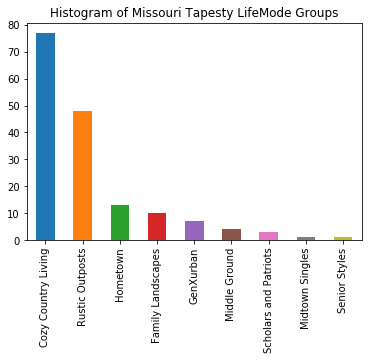

In [77]:
plot_data.plot.bar ()
plt.title ("Histogram of Missouri Tapesty LifeMode Groups")

## Pie Chart:

Text(0.5,1,'Histogram of Missouri Tapesty LifeMode Groups')

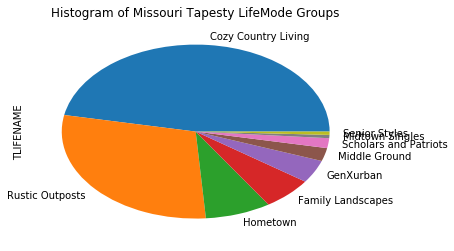

In [78]:
plot_data.plot.pie ()
plt.title ("Histogram of Missouri Tapesty LifeMode Groups")

In [79]:
sdf ["TSEGNAME"].mode()

0    Rooted Rural
dtype: object

## Dominant Tapestry Segment Name for MO: Rooted Rural

## Histogram:

In [81]:
plot_data2 = sdf ["TSEGNAME"].value_counts ()

Text(0.5,1,'Histogram of Missouri Tapesty Segment Name')

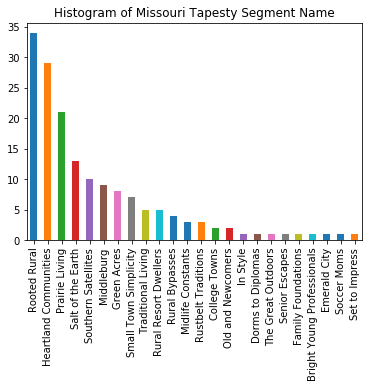

In [82]:
plot_data2.plot.bar ()
plt.title ("Histogram of Missouri Tapesty Segment Name")

## Pie Chart

Text(0.5,1,'Histogram of Missouri Tapesty Segment Name')

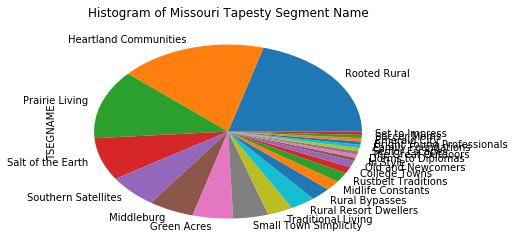

In [83]:
plot_data2.plot.pie ()
plt.title ("Histogram of Missouri Tapesty Segment Name")